In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [39]:
x = tf.constant([1.0,2.0,3.0,4.0,5.0,6.0], shape=[1, 6], name='x')
y = tf.constant([1.0,2.0,3.0,4.0,5.0,6.0], shape=[1, 6], name='y')
with tf.name_scope ("array_x"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            output = sess.run(x[i])
            print(output)
    

with tf.name_scope ("array_y"):
    with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            output1 = sess.run(y[i])
            print(output1)
            

[ 1.  2.  3.  4.  5.  6.]
[ 1.  2.  3.  4.  5.  6.]


In [32]:
 with tf.name_scope("Scope_variance"):
          mean_of_x=tf.reduce_mean(x)
          mean_of_y =tf.reduce_mean(y)


Tensor("Scope_variance_6/Mean_1:0", shape=(), dtype=float32)


In [34]:
 with tf.name_scope("Scope_variance"):
        
       
       ## mean_sqx=tf.multiply( mean_of_x, mean_of_x)
        ##mean_sqy=tf.multiply( mean_of_y, mean_of_y)
        subtract1=tf.subtract(x,mean_of_x)
        sess=tf.Session()
        print( sess.run(mean_of_x))
        multiply1=tf.multiply(subtract1,subtract1)
        variance=tf.reduce_sum(multiply1)
        
        sess=tf.Session()
print( sess.run(variance))

3.5
17.5


In [20]:
 with tf.name_scope("Scope_covariance"):
         with tf.name_scope("Scope_multication"):
                 subtract2=tf.subtract(y,mean_of_y)
                 multiply2=tf.multiply(subtract1,subtract2)
                 covariance=tf.reduce_sum(multiply2)
                 sess=tf.Session()
                 print(sess.run(covariance))
                
                
        

17.5


In [21]:
with tf.name_scope("Scope_value_c"):
    c=tf.divide(covariance,variance)
    sess=tf.Session()
    print(sess.run(c))

1.0


In [35]:
with tf.name_scope("Scope_value_m"):
    with tf.name_scope("Scope_multiply"):
        multiply3=tf.multiply(c,mean_of_x)
        with tf.name_scope("Scope_subtract"):
                m=tf.subtract(mean_of_y,multiply3)
                sess=tf.Session()
                print(sess.run(m))
    

0.0


In [23]:
 writer = tf.summary.FileWriter("/tmp/tboard/assignment2", sess.graph)

In [41]:
with tf.Session() as sess:
    x1=sess.run(x)
    y1=sess.run(y)
array_X = np.asarray(x1)
array_Y = np.asarray(y1)
value_X=tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
with tf.Session() as sess:
    value_X1=sess.run(value_X)
value_X2=np.asarray(value_X1)
value_Y=[0]*6
with tf.Session() as sess:
        for i in range(len(sess.run(value_X))):
            output = sess.run(value_X[i])
            t1=tf.multiply(output,c)
            t2=tf.add(t1,m)
            value_Y[i]=sess.run(t2)
print(value_Y)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


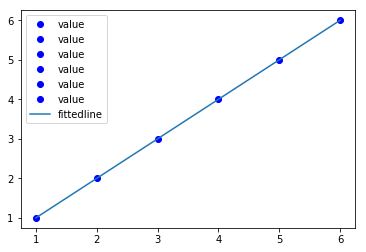

In [42]:
plt.plot(array_X, array_Y, 'bo', label='value')
plt.plot(value_X2, value_Y, label='fittedline')
plt.legend()
plt.show()

In [43]:
#root mean square
with tf.name_scope("rootmean_square"):
    rootmean=tf.sqrt(tf.reduce_mean(tf.squared_difference(array_X,array_Y)))
    with tf.Session() as sess:
        print(sess.run(rootmean))

0.0
